<a href="https://colab.research.google.com/github/Lazysheep2031/Pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [80]:
# Convert MNIST Image Files into a Tensor of 4-Dimensions (# of images, Height,Width,Color Channels)
transform = transforms.ToTensor()

In [81]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [82]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [83]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [84]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [85]:
# Create a small batch size of images ... 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [86]:
# Define Our CNN Model
# Describe convolutional layer and what it's doing (2 convolutional layers)
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [87]:
# Grab 1 MNIST record
for i, (X_train, y_train) in enumerate(train_data):
    break

In [88]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [89]:
X_train.shape

torch.Size([1, 28, 28])

In [90]:
x = X_train.view(1, 1, 28, 28)

In [91]:
# Perform our first convolution
x = F.relu(conv1(x)) # #Recitified Liner Unit for our activation function

In [92]:
# 1 single image, 6 is the filters , 26x26
x.shape

torch.Size([1, 6, 26, 26])

In [93]:
# pass thru the pooling layer
x = F.max_pool2d(x, 2, 2)# kernal of 2 and stride of 2

In [94]:
x.shape # 26 /2 = 13

torch.Size([1, 6, 13, 13])

In [95]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [96]:
x.shape # No Padding, so we lose the outside pixels

torch.Size([1, 16, 11, 11])

In [97]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [98]:
x.shape

torch.Size([1, 16, 5, 5])

In [99]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1,6,3,1)
      self.conv2 = nn.Conv2d(6,16,3,1)
      # Fully Connected layer
      self.fc1 = nn.Linear(5*5*16, 120)
      self.fc2 = nn.Linear(120,84)
      self.fc3 = nn.Linear(84,10)

  def forward(self, x):
      X = F.relu(self.conv1(x))
      X = F.max_pool2d(X,2,2)
      X = F.relu(self.conv2(X))
      X = F.max_pool2d(X,2,2)

      # Re-View to flatten it out
      X = X.view(-1, 16*5*5)

      # Fully Connected Layers
      X = F.relu(self.fc1(X))
      X = F.relu(self.fc2(X))
      X = self.fc3(X)

      return F.log_softmax(X, dim=1)

In [100]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [101]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [102]:
import time
start_time = time.time()

# Create Variables to Track Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train)# get predicted values from training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # compare predicted values to actual

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of the correct predictions.
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch.
    trn_corr += batch_corr # keep track as we go along in training

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b % 600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
elapsed_time = current_time - start_time
print(f'Training Took:{elapsed_time/60} minutes !')

Epoch: 0 Batch: 600 Loss: 0.16236107051372528
Epoch: 0 Batch: 1200 Loss: 0.15510495007038116
Epoch: 0 Batch: 1800 Loss: 0.4651116728782654
Epoch: 0 Batch: 2400 Loss: 0.17726822197437286
Epoch: 0 Batch: 3000 Loss: 0.007429888937622309
Epoch: 0 Batch: 3600 Loss: 0.37731707096099854
Epoch: 0 Batch: 4200 Loss: 0.004938055761158466
Epoch: 0 Batch: 4800 Loss: 0.0015040982980281115
Epoch: 0 Batch: 5400 Loss: 0.06845302879810333
Epoch: 0 Batch: 6000 Loss: 0.0004587689763866365
Epoch: 1 Batch: 600 Loss: 0.002925408538430929
Epoch: 1 Batch: 1200 Loss: 0.2792360186576843
Epoch: 1 Batch: 1800 Loss: 0.0018853390356525779
Epoch: 1 Batch: 2400 Loss: 0.0030733426101505756
Epoch: 1 Batch: 3000 Loss: 0.024190708994865417
Epoch: 1 Batch: 3600 Loss: 0.5062173008918762
Epoch: 1 Batch: 4200 Loss: 0.02014169655740261
Epoch: 1 Batch: 4800 Loss: 0.001421573688276112
Epoch: 1 Batch: 5400 Loss: 0.0006034405087120831
Epoch: 1 Batch: 6000 Loss: 0.1528162956237793
Epoch: 2 Batch: 600 Loss: 0.07298740744590759
Epoch

In [103]:
train_losses

[tensor(0.0005, grad_fn=<NllLossBackward0>),
 tensor(0.1528, grad_fn=<NllLossBackward0>),
 tensor(0.4062, grad_fn=<NllLossBackward0>),
 tensor(0.0004, grad_fn=<NllLossBackward0>),
 tensor(2.0396e-05, grad_fn=<NllLossBackward0>)]

In [104]:
test_losses

[tensor(0.0039),
 tensor(0.0002),
 tensor(0.0006),
 tensor(0.0006),
 tensor(0.0004)]

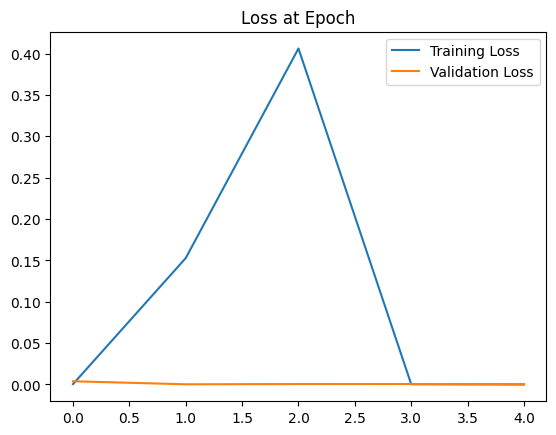

In [105]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()


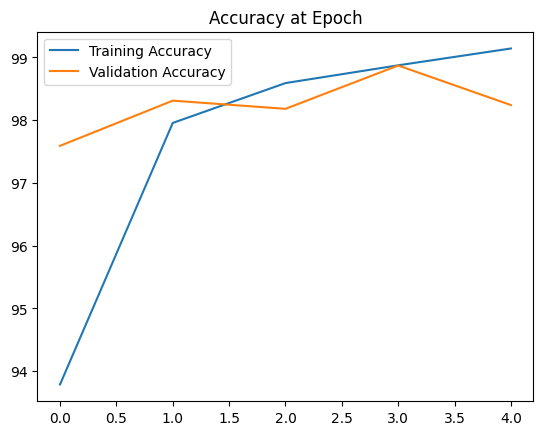

In [106]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at Epoch")
plt.legend()

In [107]:
test_load_anything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [109]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_anything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

In [111]:
# Did for correct
correct.item()/len(test_data)*100

98.24000000000001

In [112]:
# Grab an image
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [113]:
# Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [114]:
# Reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

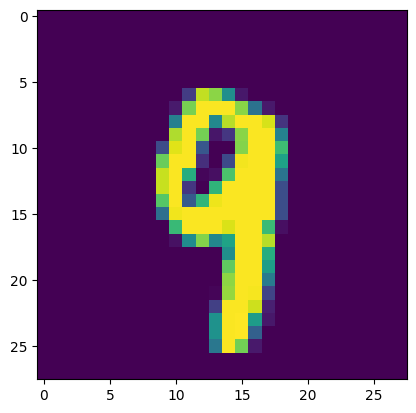

In [116]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [118]:
# Pass the image thru our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))

In [119]:
new_prediction

tensor([[-2.1717e+01, -1.6157e+01, -2.3344e+01, -1.3988e+01, -1.1304e+01,
         -1.8065e+01, -2.9872e+01, -1.2758e+01, -1.4630e+01, -1.6570e-05]])

In [120]:
new_prediction.argmax()

tensor(9)